In [1]:
from scoresbibm.utils.data_utils import query, get_summary_df,load_model
from scoresbibm.utils.plot import plot_metric_by_num_simulations, use_style,multi_plot

from scoresbibm.tasks.unstructured_tasks import LotkaVolterraTask

import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
print("Hey")

Hey


In [3]:
DEFAULT_COLORS = {"npe": "#154c79", "nle": "#1e81b0", "nre": "#76b5c5", "nspe": "#fdae61", "score_transformer": "#d73027", "score_transformer_posterior": "#8b27d7", "score_transformer_directed": "#f25d1d","score_transformer_min_graphical": "#f25d1d", "score_transformer_undirected": "#911c1c", "score_transformer_graphical": "#911c1c"}
figsize_per_row = 1.75
figsize_per_col = 2.

COLOR_PREDATOR = "firebrick"
COLOR_PREY = "seagreen"
COLOR_PARAMETER = "navy"

PATH = "../../results/bm_lv"

In [4]:
df = query(PATH)

/mnt/qb/work/macke/mgloeckler90/simformer/src/scoresbibm/scoresbibm/utils/plot.py:459: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


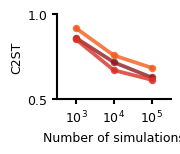

In [5]:
with use_style("pyloric"):
    fig, axes = multi_plot(PATH, "task", "metric", plot_metric_by_num_simulations, hue="method", metric="c2st", color_map=DEFAULT_COLORS, figsize_per_row=figsize_per_row, figsize_per_col=figsize_per_col, legend_ncol=4, method_sde_name="vesde", alpha=0.8)
    legend = fig.legends[-1]
    axes[0,0].set_title("")
    axes[0,0].set_yticks([0.5,1])
    fig.legends = []
    fig.savefig("bm_lv.svg")
    plt.show()

/mnt/qb/work/macke/mgloeckler90/simformer/src/scoresbibm/scoresbibm/utils/plot.py:459: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


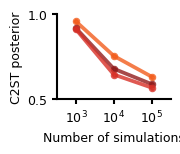

In [6]:
with use_style("pyloric"):
    # FAKE data
    fig, axes = multi_plot(PATH, "task", "metric", plot_metric_by_num_simulations, metric="c2st_posterior", hue="method", color_map=DEFAULT_COLORS, figsize_per_row=figsize_per_row, figsize_per_col=figsize_per_col, legend_ncol=4, method_sde_name="vesde", alpha=0.8)
    legend = fig.legends[-1]
    fig.legends = []
    axes[0,0].set_title("")
    axes[0,0].set_yticks([0.5,1])
    axes[0,0].set_ylabel("C2ST posterior")
    fig.savefig("bm_lv_posterior.svg")
    plt.show()

/tmp/ipykernel_2622978/2026002704.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  fig.legend(ncol=1, handles=[legend.legendHandles[2], legend.legendHandles[1], legend.legendHandles[0]], labels=["  Simformer", "  Simformer\n (undirected graph)", "  Simformer\n (directed graph)"], loc="center", bbox_to_anchor=(0., 0.5))


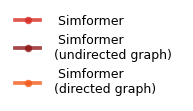

: 

In [7]:
with use_style("pyloric"):
    fig = plt.figure(figsize=(1,0.2))
    ax = plt.gca()
    plt.axis("off")
    fig.legend(ncol=1, handles=[legend.legendHandles[2], legend.legendHandles[1], legend.legendHandles[0]], labels=["  Simformer", "  Simformer\n (undirected graph)", "  Simformer\n (directed graph)"], loc="center", bbox_to_anchor=(0., 0.5))
    
    fig.savefig("method_legend.svg", transparent=True, bbox_inches="tight")
    plt.show()

In [8]:
task = LotkaVolterraTask()

observation_generator = task.get_observation_generator()
reference_sampler = task.get_reference_sampler()
observation_stream = observation_generator(jax.random.PRNGKey(5))

In [12]:
df = query(PATH, method="score_transformer", num_simulations=100000, method_sde_name="vesde")

In [29]:
query(PATH, metric="none")

,method,task,num_simulations,seed,model_id,metric,value,time_train,time_eval,cfg
0,score_transformer_undirected,lotka_volterra,1000,0,0,none,NaN,289.933221,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."
1,score_transformer_directed,lotka_volterra,10000,0,1,none,NaN,1584.350007,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."
2,score_transformer,lotka_volterra,1000,0,2,none,NaN,269.056935,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."
3,score_transformer_undirected,lotka_volterra,10000,0,3,none,NaN,1365.112971,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."
4,score_transformer,lotka_volterra,10000,0,4,none,NaN,1267.277958,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."
5,score_transformer_directed,lotka_volterra,100000,0,5,none,NaN,4567.962958,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."
6,score_transformer_undirected,lotka_volterra,100000,0,6,none,NaN,4831.084610,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."
7,score_transformer,lotka_volterra,100000,0,7,none,NaN,4448.747782,NaN,"{'name': 'bm_lv', 'seed': 0, 'model_id': None,..."


In [14]:
model = load_model(PATH, df["model_id"].iloc[0])

In [15]:
num_time_points = 200
node_id = jnp.array([0,1,2,3] + [4]*num_time_points + [5]*num_time_points)
time_grid = jnp.linspace(0, 15, num_time_points)
meta_data = jnp.concatenate([jnp.full((4,), jnp.nan), time_grid,time_grid])
condition_mask_posterior = jnp.array([False]*4 + [False]*num_time_points + [False]*num_time_points)
x_o = jnp.array([])

In [16]:
_, _, xs, meta_data, _ = next(observation_stream)

In [17]:
_, ts_o1, ts_o2 = jnp.split(meta_data, [4, 24])

In [18]:

index1 = jnp.searchsorted(time_grid, ts_o1)[:4]
time_grid = time_grid.at[index1].set(ts_o1[:4])
meta_data = jnp.concatenate([jnp.full((4,), jnp.nan), time_grid,time_grid])
condition_mask_posterior = condition_mask_posterior.at[4 + index1].set(True)
x_o = xs[4:8]

In [19]:
posterior_and_predictive = model.sample(1000, x_o=x_o, condition_mask=condition_mask_posterior, node_id=node_id, meta_data=meta_data, rng=jax.random.PRNGKey(0), return_conditioned_samples=True)

In [20]:
thetas, predator,prey = jnp.split(posterior_and_predictive, [4,4+num_time_points], axis=1)
_,condition_mask_predator, condition_mask_prey = jnp.split(condition_mask_posterior, [4,4+num_time_points])
mean_predator = jnp.mean(predator, axis=0)[~condition_mask_predator]
q_l = jnp.percentile(predator, 0.5, axis=0)[~condition_mask_predator]
q_u = jnp.percentile(predator, 99.5, axis=0)[~condition_mask_predator]

mean_prey = jnp.mean(prey, axis=0)[~condition_mask_prey]
q_l_prey = jnp.percentile(prey, 0.5, axis=0)[~condition_mask_prey]
q_u_prey = jnp.percentile(prey, 99.5, axis=0)[~condition_mask_prey]


# Smooth mean and quantiles (monte carlo error)
from scipy.signal import savgol_filter
mean_predator = savgol_filter(mean_predator, 12, 3)
q_l = savgol_filter(q_l, 12, 3)
q_u = savgol_filter(q_u, 12, 3)

mean_prey = savgol_filter(mean_prey, 12, 3)
q_l_prey = savgol_filter(q_l_prey, 12, 3)
q_u_prey = savgol_filter(q_u_prey, 12, 3)



In [21]:
import matplotlib.gridspec as gridspec
import seaborn as sns

/tmp/ipykernel_1128257/2022622466.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ = sns.kdeplot(thetas[:,0], ax=ax1, color=COLOR_PARAMETER, shade=True)
/tmp/ipykernel_1128257/2022622466.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(thetas[:,i], ax=ax, color=COLOR_PARAMETER, shade=True)
/tmp/ipykernel_1128257/2022622466.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(thetas[:,i], ax=ax, color=COLOR_PARAMETER, shade=True)
/tmp/ipykernel_1128257/2022622466.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

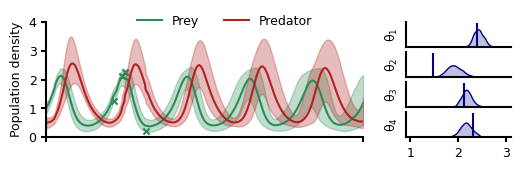

In [22]:
with use_style("pyloric"):
    fig = plt.figure(figsize=(6, 1.5))
    gs = gridspec.GridSpec(4, 2, width_ratios=[3, 1])
    ax0 = plt.subplot(gs[:, 0])
    _ = ax0.scatter(ts_o1[:4], x_o[:4], color=COLOR_PREY, marker="x", s=20)
    l1 = ax0.plot(time_grid[~condition_mask_predator], mean_predator, color=COLOR_PREY, label="Prey")
    _ = ax0.fill_between(time_grid[~condition_mask_predator], q_l, q_u, alpha=0.3, color=COLOR_PREY)
    ax0.set_ylim(0,4)
    ax0.set_xlim(0,15)
    ax0.set_xticks([0,15])

    #_= ax0.scatter(ts_o2[10:], x_o[3:], color="C1", marker="x", s=20)
    l2 = ax0.plot(time_grid[~condition_mask_prey], mean_prey, color=COLOR_PREDATOR, label="Predator")
    _ = ax0.fill_between(time_grid[~condition_mask_prey], q_l_prey, q_u_prey, alpha=0.3, color=COLOR_PREDATOR)
    
    ax0.set_xlabel("Time")
    ax0.set_ylabel("Population density")
    ax0.set_ylim(0,4)
    ax0.legend(handles=[l1[0],l2[0]], ncols=2, bbox_to_anchor=(0.25,0.85))
    
    ax1 = plt.subplot(gs[0, 1])
    _ = sns.kdeplot(thetas[:,0], ax=ax1, color=COLOR_PARAMETER, shade=True)
    ax1.vlines(xs[0], 0, 5, color=COLOR_PARAMETER)
    ax1.set_ylabel(r"$\theta_1$")
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_xticklabels([])
    ax1.set_xlim(0.9,3.1)
    for i in range(1,4):
        ax = plt.subplot(gs[i, 1])
        ax = sns.kdeplot(thetas[:,i], ax=ax, color=COLOR_PARAMETER, shade=True)
        ax.set_ylabel(r"$\theta_{}$".format(i+1))
        ax.set_xlim(0.9,3.1)
        ax.vlines(xs[i], 0, 5, color=COLOR_PARAMETER)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
    ax.set_xticks([1,2,3])
    ax.set_xticklabels([1,2,3])
    ax0.set_xticklabels([])
    ax0.set_xlabel("")
    #fig.suptitle("Unstructured and missing observations", y=1.1)
    fig.savefig("lv_few_observations.svg", transparent=True)
    plt.show()


In [23]:
index2 = jnp.searchsorted(time_grid, ts_o2)[10:]
time_grid = time_grid.at[index2].set(ts_o2[10:])
meta_data = jnp.concatenate([jnp.full((4,), jnp.nan), time_grid,time_grid])
condition_mask_posterior = condition_mask_posterior.at[4 + num_time_points + index2].set(True)
x_o = jnp.concatenate([x_o, xs[4 + 20 + 10:]])

In [24]:
print(x_o.shape, condition_mask_posterior.sum(), meta_data.shape)

(14,) 14 (404,)


In [25]:
posterior_and_predictive2 = model.sample(1000, x_o=x_o, condition_mask=condition_mask_posterior, node_id=node_id, meta_data=meta_data, rng=jax.random.PRNGKey(0), return_conditioned_samples=True)

In [26]:
thetas, predator,prey = jnp.split(posterior_and_predictive2, [4,4+num_time_points], axis=1)
_,condition_mask_predator, condition_mask_prey = jnp.split(condition_mask_posterior, [4,4+num_time_points])
mean_predator2 = jnp.mean(predator, axis=0)[~condition_mask_predator]
q_l2 = jnp.percentile(predator, 0.5, axis=0)[~condition_mask_predator]
q_u2 = jnp.percentile(predator, 99.5, axis=0)[~condition_mask_predator]

mean_prey2 = jnp.mean(prey, axis=0)[~condition_mask_prey]
q_l_prey2 = jnp.percentile(prey, 0.5, axis=0)[~condition_mask_prey]
q_u_prey2 = jnp.percentile(prey, 99.5, axis=0)[~condition_mask_prey]

# Smooth mean and quantiles using jax scipy signal 
from scipy.signal import savgol_filter
mean_predator2 = savgol_filter(mean_predator2, 12, 3)
q_l2 = savgol_filter(q_l2, 12, 3)
q_u2 = savgol_filter(q_u2, 12, 3)

mean_prey2 = savgol_filter(mean_prey2, 12, 3)
q_l_prey2 = savgol_filter(q_l_prey2, 12, 3)
q_u_prey2 = savgol_filter(q_u_prey2, 12, 3)



In [27]:
import matplotlib.gridspec as gridspec
import seaborn as sns

/tmp/ipykernel_1128257/2253903047.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ = sns.kdeplot(thetas[:,0], ax=ax1, color=COLOR_PARAMETER, shade=True)
/tmp/ipykernel_1128257/2253903047.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(thetas[:,i], ax=ax, color=COLOR_PARAMETER, shade=True)
/tmp/ipykernel_1128257/2253903047.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(thetas[:,i], ax=ax, color=COLOR_PARAMETER, shade=True)
/tmp/ipykernel_1128257/2253903047.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

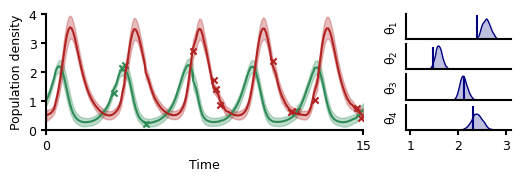

In [28]:
with use_style("pyloric"):
    fig = plt.figure(figsize=(6, 1.5))
    gs = gridspec.GridSpec(4, 2, width_ratios=[3, 1])
    ax0 = plt.subplot(gs[:, 0])
    _ = ax0.scatter(ts_o1[:4], x_o[:4], color=COLOR_PREY, marker="x", s=20)
    l1 = ax0.plot(time_grid[~condition_mask_predator], mean_predator2, color=COLOR_PREY, label="Prey")
    _ = ax0.fill_between(time_grid[~condition_mask_predator], q_l2, q_u2, alpha=0.3, color=COLOR_PREY)

    _= ax0.scatter(ts_o2[10:], x_o[4:], color=COLOR_PREDATOR, marker="x", s=20)
    l2 = ax0.plot(time_grid[~condition_mask_prey], mean_prey2, color=COLOR_PREDATOR, label="Predator")
    _ = ax0.fill_between(time_grid[~condition_mask_prey], q_l_prey2, q_u_prey2, alpha=0.3, color=COLOR_PREDATOR)
    
    ax0.set_xlim(0,15)
    ax0.set_xticks([0,15])
    ax0.set_ylim(0,4)
    
    ax0.set_xlabel("Time")
    ax0.set_ylabel("Population density")
    ax0.set_ylim(0,4)
    #ax0.legend(handles=[l1[0],l2[0]], ncols=2, bbox_to_anchor=(0.25,0.85))
    
    ax1 = plt.subplot(gs[0, 1])
    _ = sns.kdeplot(thetas[:,0], ax=ax1, color=COLOR_PARAMETER, shade=True)
    ax1.vlines(xs[0], 0, 5, color=COLOR_PARAMETER)
    ax1.set_ylabel(r"$\theta_1$")
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_xticklabels([])
    ax1.set_xlim(0.9,3.1)
    for i in range(1,4):
        ax = plt.subplot(gs[i, 1])
        ax = sns.kdeplot(thetas[:,i], ax=ax, color=COLOR_PARAMETER, shade=True)
        ax.set_ylabel(r"$\theta_{}$".format(i+1))
        ax.set_xlim(0.9,3.1)
        ax.set_xticks([1.,2.,3.])
        ax.vlines(xs[i], 0, 5, color=COLOR_PARAMETER)
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_xticks([])
    ax.set_xticks([1,2,3])
    ax.set_xticklabels([1,2,3])
    
    fig.savefig("lv_many_observations.svg")
    plt.show()
